In [1]:
from a4_helper import predict,MyDataForInference
from one_stage_detector import FCOS
import torch

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
NUM_CLASSES = 20

detector = FCOS(
    num_classes=NUM_CLASSES,
    fpn_channels=128,
    stem_channels=[128, 128],
)
detector.load_state_dict(torch.load("fcos_detector.pt"))
detector = detector.to(DEVICE)

d:\Anaconda3\envs\cv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
d:\Anaconda3\envs\cv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=RegNet_X_400MF_Weights.IMAGENET1K_V1`. You can also use `weights=RegNet_X_400MF_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


For dummy input images with shape: (2, 3, 224, 224)
Shape of c3 features: torch.Size([2, 64, 28, 28])
Shape of c4 features: torch.Size([2, 160, 14, 14])
Shape of c5 features: torch.Size([2, 400, 7, 7])


In [2]:
original = 'original'
# test_dir = 'testset'
test_dir = 'original'

# # resize the imgae to 224*224
# import os
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# def resize_img(img_path):
#     img = cv2.imread(img_path)
#     img = cv2.resize(img, (224, 224))
#     return img

# names = [name for name in os.listdir(original) if name.endswith('.png') or name.endswith('.jpg')]
# for name in names:
#     img = resize_img(os.path.join(original, name))
#     cv2.imwrite(os.path.join(test_dir, name), img)
#     print(name)

Total inference time: 1.3s


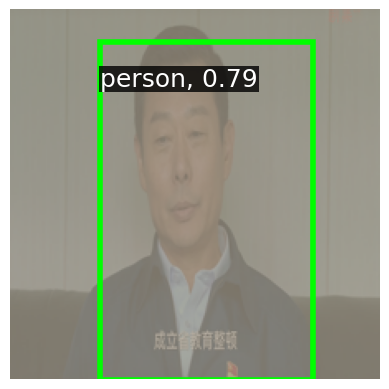

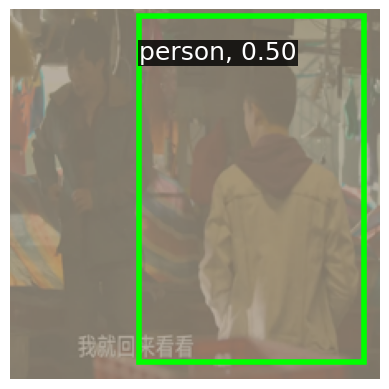

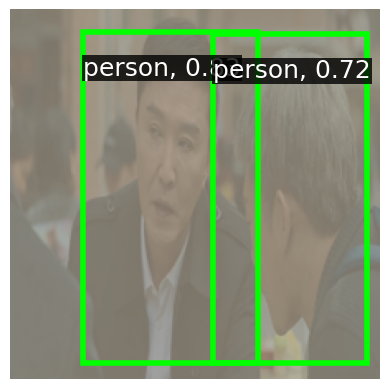

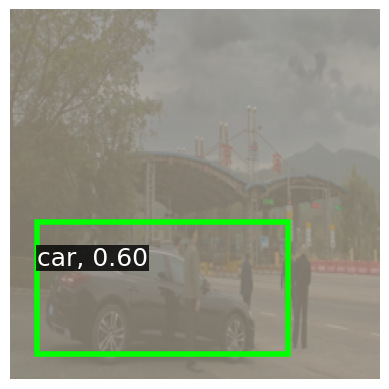

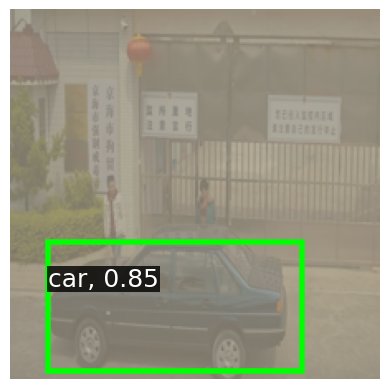

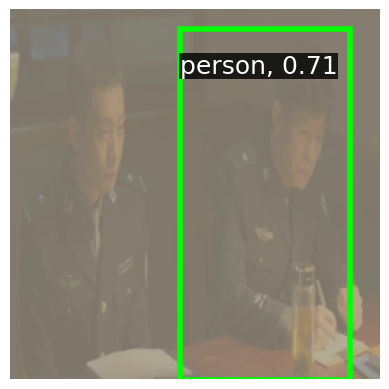

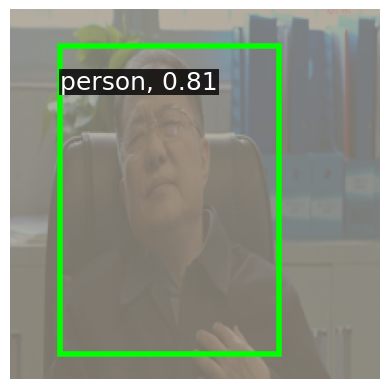

In [14]:
dataset = MyDataForInference(dataset_dir=test_dir,image_size=224)
test_loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False)

predict(detector=detector,
        test_loader = test_loader,
        score_thresh=0.5,
        nms_thresh=0.5,
        output_dir='output',
        device=DEVICE,
        dtype=torch.float32,
        idx_to_class=dataset.idx_to_class)